<a href="https://colab.research.google.com/github/Rickymuhindo/Rickymuhindo/blob/main/Svm_Classical_Computer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
import re


In [21]:
%matplotlib inline

In [ ]:
#df_data=pd.concat([df_books,df_dvd, df_kit], axis=0)

In [22]:
from google.colab import files
import pandas as pd

# Upload the Excel file
uploaded = files.upload()

# Load the uploaded file
df = pd.read_excel('sample5.xlsx')

# Display the DataFrame
df.head()

Saving sample5.xlsx to sample5 (1).xlsx


,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,True,2015-02-23,AF20MS7CT2D3X,B00D9AREZC,NaN,Sol Rothenberg,Cheap quality phone with modern android.,Five Stars,1424649600,NaN,NaN
1,True,2015-06-21,A28VCZNW8CFI6C,B00P4Q8J7Q,NaN,Leona,great item,Five Stars,1434844800,NaN,NaN
2,True,2013-05-23,A16Z34V33I8Y1T,B006H5PZ7K,"{'Size:': ' Value not found', 'Color:': ' Blac...",StuckinKS,Got this case for a work phone. It does the jo...,Good case for the price.,1369267200,NaN,NaN
3,True,2016-06-14,AUVIIDGY026HH,B017SARA9I,NaN,Anozira Fire,Super strong charge from this! Very sturdy and...,Five Stars,1465862400,NaN,NaN
4,True,2013-04-15,A9CJLAYWQ5USM,B00B1QZRJQ,NaN,Cristian,The home button is so adorable! It doesn't loo...,Shipping came sooner than expected!,1365984000,3.0,NaN


In [13]:
df.shape

(1000, 11)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   verified        1000 non-null   bool          
 1   reviewTime      1000 non-null   datetime64[ns]
 2   reviewerID      1000 non-null   object        
 3   asin            1000 non-null   object        
 4   style           571 non-null    object        
 5   reviewerName    1000 non-null   object        
 6   reviewText      1000 non-null   object        
 7   summary         1000 non-null   object        
 8   unixReviewTime  1000 non-null   int64         
 9   vote            74 non-null     float64       
 10  image           17 non-null     object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 79.2+ KB


In [15]:
df.head(5)

,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,True,2015-02-23,AF20MS7CT2D3X,B00D9AREZC,NaN,Sol Rothenberg,Cheap quality phone with modern android.,Five Stars,1424649600,NaN,NaN
1,True,2015-06-21,A28VCZNW8CFI6C,B00P4Q8J7Q,NaN,Leona,great item,Five Stars,1434844800,NaN,NaN
2,True,2013-05-23,A16Z34V33I8Y1T,B006H5PZ7K,"{'Size:': ' Value not found', 'Color:': ' Blac...",StuckinKS,Got this case for a work phone. It does the jo...,Good case for the price.,1369267200,NaN,NaN
3,True,2016-06-14,AUVIIDGY026HH,B017SARA9I,NaN,Anozira Fire,Super strong charge from this! Very sturdy and...,Five Stars,1465862400,NaN,NaN
4,True,2013-04-15,A9CJLAYWQ5USM,B00B1QZRJQ,NaN,Cristian,The home button is so adorable! It doesn't loo...,Shipping came sooner than expected!,1365984000,3.0,NaN


In [24]:
df.describe()

,reviewTime,unixReviewTime,vote
count,1000,1.000000e+03,74.000000
mean,2015-07-27 05:38:24.000000256,1.437976e+09,11.445946
min,2007-12-30 00:00:00,1.198973e+09,2.000000
25%,2014-10-08 18:00:00,1.412791e+09,2.000000
50%,2015-09-09 12:00:00,1.441800e+09,4.000000
75%,2016-07-13 06:00:00,1.468390e+09,9.000000
max,2018-07-30 00:00:00,1.532909e+09,155.000000
std,NaN,4.360580e+07,22.121174


In [ ]:
categorical = df.dtypes[df.dtypes == "object"].index
print(categorical)
df[categorical].describe

Index(['reviewTime', 'reviewerID', 'asin', 'style', 'reviewerName',
       'reviewText', 'summary', 'vote', 'image'],
      dtype='object')


<bound method NDFrame.describe of           reviewTime      reviewerID        asin                 style  \
0         08 4, 2014  A24E3SXTC62LJI  7508492919  {'Color:': ' Bling'}   
1        02 12, 2014  A269FLZCB4GIPV  7508492919                   NaN   
2         02 8, 2014   AB6CHQWHZW4TV  7508492919                   NaN   
3         02 4, 2014   A1M117A53LEI8  7508492919                   NaN   
4         02 3, 2014  A272DUT8M88ZS8  7508492919                   NaN   
...              ...             ...         ...                   ...   
1128432  12 22, 2016  A1QWMCG1FNEP3A  B01HJC7N4C                   NaN   
1128433  07 15, 2016  A3FOBEJ9UVUTR3  B01HJC7N4C                   NaN   
1128434  07 14, 2016   AMUEAMKB4E33M  B01HJC7N4C                   NaN   
1128435  07 13, 2016  A2EV91MMOJ3IL4  B01HJC7N4C                   NaN   
1128436  05 11, 2017   ARKQD9Z1VPOV2  B01HJH9IN6                   NaN   

             reviewerName                                         reviewText 

In [17]:
df["reviewText"][0:15]

0              Cheap quality phone with modern android.
1                                            great item
2     Got this case for a work phone. It does the jo...
3     Super strong charge from this! Very sturdy and...
4     The home button is so adorable! It doesn't loo...
5     Works well but its misleading, the pictures an...
6                                             Excellent
7     I bought these at Apple.  Disappointed.  Have ...
8           Great charger. Fit nicely and space saving.
9                                        loving my case
10    This dock is amazing!  I was a little apprehen...
11    Again this is Mt last commit on this item. It ...
12    These are the best screen protectors I have ev...
13    Just what I was looking for. A good buy at a g...
14    I bought this screen protector after having a ...
Name: reviewText, dtype: object

In [25]:
df["vote"].describe()

count     74.000000
mean      11.445946
std       22.121174
min        2.000000
25%        2.000000
50%        4.000000
75%        9.000000
max      155.000000
Name: vote, dtype: float64

In [27]:
df["vote"].unique()

array([ nan,   3.,   2.,   5.,   4.,   8.,   6.,  12.,  42.,  13.,  15.,
        63.,  45.,  26.,  10.,   9.,  43.,  37.,  38., 155.,  17.,  74.,
         7.,  11.,  21.])

array([[<Axes: title={'center': 'vote'}>]], dtype=object)

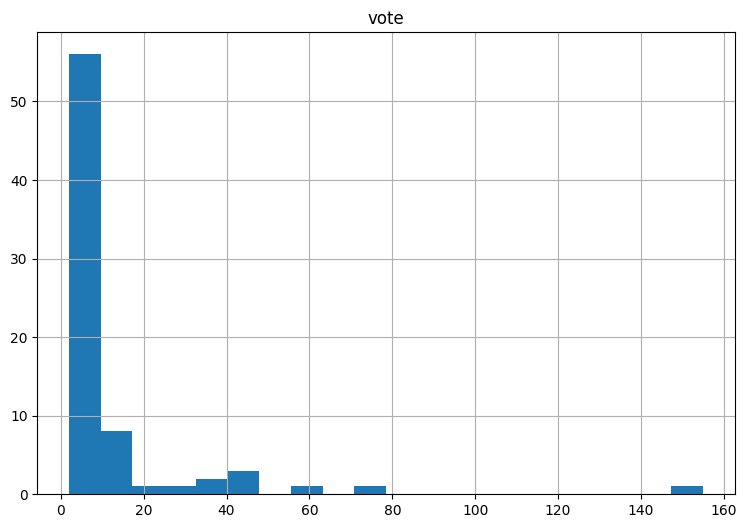

In [29]:
import matplotlib.pyplot as plt
df.hist(column='vote',
        figsize=(9,6),
        bins=20)

In [30]:
df=df[["vote","verified","reviewText"]]

In [31]:
df=df.dropna()
df = df.reset_index(drop=True)
df

,vote,verified,reviewText
0,3.0,True,The home button is so adorable! It doesn't loo...
1,2.0,True,This dock is amazing! I was a little apprehen...
2,2.0,True,I am a loyal T-Mobile customer for more than 4...
3,2.0,True,The system is definitely well built with plent...
4,5.0,True,I bought this Solar Portable Battery Pack with...
...,...,...,...
69,4.0,True,*UPDATE* I am dropping my review from 3 Stars ...
70,21.0,True,I am going to make an admission here: I ordere...
71,7.0,True,I had two OtterBox Commuter cases (2nd just fo...
72,15.0,False,Just remember before you buy this belt. You wi...


In [32]:
df = df[df['verified'] == True]

In [33]:
print(df)

    vote  verified                                         reviewText
0    3.0      True  The home button is so adorable! It doesn't loo...
1    2.0      True  This dock is amazing!  I was a little apprehen...
2    2.0      True  I am a loyal T-Mobile customer for more than 4...
3    2.0      True  The system is definitely well built with plent...
4    5.0      True  I bought this Solar Portable Battery Pack with...
5    4.0      True  I have had several headsets over the years inc...
6    2.0      True  I really like it! Image is sharp and clear. Wo...
7    2.0      True  Great tpu case for the Nexus 9. I have the exa...
10   2.0      True  I have had my phone for 4 months now & I still...
11   6.0      True  This is a very interesting phone - I like the ...
12   3.0      True  My mother is in love with the case. It is easy...
14   2.0      True  Absolutely fantastic! I will never use anythin...
15  12.0      True  I don't need the reflective film because it re...
16   3.0      True  

In [35]:
df["verified"].unique()

array([ True])

In [36]:
df=df[["vote","reviewText"]]

In [37]:
print(df)

    vote                                         reviewText
0    3.0  The home button is so adorable! It doesn't loo...
1    2.0  This dock is amazing!  I was a little apprehen...
2    2.0  I am a loyal T-Mobile customer for more than 4...
3    2.0  The system is definitely well built with plent...
4    5.0  I bought this Solar Portable Battery Pack with...
5    4.0  I have had several headsets over the years inc...
6    2.0  I really like it! Image is sharp and clear. Wo...
7    2.0  Great tpu case for the Nexus 9. I have the exa...
10   2.0  I have had my phone for 4 months now & I still...
11   6.0  This is a very interesting phone - I like the ...
12   3.0  My mother is in love with the case. It is easy...
14   2.0  Absolutely fantastic! I will never use anythin...
15  12.0  I don't need the reflective film because it re...
16   3.0  This screen protector was cheap and eligible f...
17   2.0  It's wonderful and perfect! Hard case, doesn't...
18   3.0  What else can I say. Fast deli

In [39]:
df["vote"].describe()

count    58.000000
mean     10.258621
std      15.662628
min       2.000000
25%       2.000000
50%       4.000000
75%       9.000000
max      74.000000
Name: vote, dtype: float64

In [44]:
df.loc[:, "vote"] = df["vote"].astype(int)

In [46]:
df=df[df["vote"]!=3]
df["label"]=np.where(df["vote"]>=4,1,0)

In [47]:
print(df)

    vote                                         reviewText  label
1      2  This dock is amazing!  I was a little apprehen...      0
2      2  I am a loyal T-Mobile customer for more than 4...      0
3      2  The system is definitely well built with plent...      0
4      5  I bought this Solar Portable Battery Pack with...      1
5      4  I have had several headsets over the years inc...      1
6      2  I really like it! Image is sharp and clear. Wo...      0
7      2  Great tpu case for the Nexus 9. I have the exa...      0
10     2  I have had my phone for 4 months now & I still...      0
11     6  This is a very interesting phone - I like the ...      1
14     2  Absolutely fantastic! I will never use anythin...      0
15    12  I don't need the reflective film because it re...      1
17     2  It's wonderful and perfect! Hard case, doesn't...      0
19    42  I received a free sample of the PowerCore 5000...      1
21     4  Don't let the title turn you off.\n\nThe Armor...   

In [49]:
df["vote"].unique()

array([ 2,  5,  4,  6, 12, 42, 13, 15, 63, 45, 10,  9, 43, 37, 38,  8, 17,
       74,  7, 11, 21])

In [50]:
df["vote"].value_counts()

vote
2     19
4      9
7      2
5      2
9      2
43     1
11     1
74     1
17     1
8      1
38     1
37     1
10     1
45     1
63     1
15     1
13     1
42     1
12     1
6      1
21     1
Name: count, dtype: int64

In [51]:
df["reviewText"] = df["reviewText"].str.lower()

In [52]:
print(df)

    vote                                         reviewText  label
1      2  this dock is amazing!  i was a little apprehen...      0
2      2  i am a loyal t-mobile customer for more than 4...      0
3      2  the system is definitely well built with plent...      0
4      5  i bought this solar portable battery pack with...      1
5      4  i have had several headsets over the years inc...      1
6      2  i really like it! image is sharp and clear. wo...      0
7      2  great tpu case for the nexus 9. i have the exa...      0
10     2  i have had my phone for 4 months now & i still...      0
11     6  this is a very interesting phone - i like the ...      1
14     2  absolutely fantastic! i will never use anythin...      0
15    12  i don't need the reflective film because it re...      1
17     2  it's wonderful and perfect! hard case, doesn't...      0
19    42  i received a free sample of the powercore 5000...      1
21     4  don't let the title turn you off.\n\nthe armor...   

In [53]:
df["reviewText"] = df["reviewText"].str.replace(r'[^a-zA-Z\s]', '')

In [54]:
print(df)

    vote                                         reviewText  label
1      2  this dock is amazing!  i was a little apprehen...      0
2      2  i am a loyal t-mobile customer for more than 4...      0
3      2  the system is definitely well built with plent...      0
4      5  i bought this solar portable battery pack with...      1
5      4  i have had several headsets over the years inc...      1
6      2  i really like it! image is sharp and clear. wo...      0
7      2  great tpu case for the nexus 9. i have the exa...      0
10     2  i have had my phone for 4 months now & i still...      0
11     6  this is a very interesting phone - i like the ...      1
14     2  absolutely fantastic! i will never use anythin...      0
15    12  i don't need the reflective film because it re...      1
17     2  it's wonderful and perfect! hard case, doesn't...      0
19    42  i received a free sample of the powercore 5000...      1
21     4  don't let the title turn you off.\n\nthe armor...   

In [62]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [63]:
stop_words = set(stopwords.words('english'))

In [64]:
def remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)


In [65]:
df["reviewText"] = df["reviewText"].apply(remove_stopwords)

In [66]:
print(df)

    vote                                         reviewText  label
1      2  dock amazing ! little apprehensive spending mu...      0
2      2  loyal t-mobile customer 4 years purchased kits...      0
3      2  system definitely well built plenty metal part...      0
4      5  bought solar portable battery pack flashlight ...      1
5      4  several headsets years including motorola , ja...      1
6      2  really like ! image sharp clear . works great ...      0
7      2  great tpu case nexus 9. exact case nexus 6. fi...      0
10     2  phone 4 months & still love ! crap ton apps ph...      0
11     6  interesting phone - like capacitive keyboard ,...      1
14     2  absolutely fantastic ! never use anything hard...      0
15    12  n't need reflective film reflects windshield ....      1
17     2  's wonderful perfect ! hard case , n't slip , ...      0
19    42  received free sample powercore 5000 honest rev...      1
21     4  n't let title turn . armor suit shield great q...   

In [68]:
df["label"].describe()

count    50.000000
mean      0.620000
std       0.490314
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: label, dtype: float64

array([[<Axes: title={'center': 'label'}>]], dtype=object)

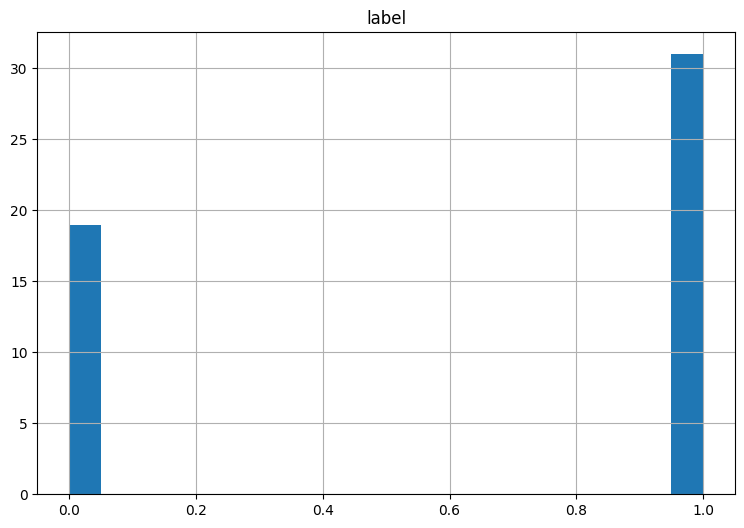

In [69]:
import matplotlib.pyplot as plt
df.hist(column='label',
        figsize=(9,6),
        bins=20)

In [70]:
import seaborn as sns

In [71]:
df = df[["reviewText", "label"]]

In [72]:
print(df)

                                           reviewText  label
1   dock amazing ! little apprehensive spending mu...      0
2   loyal t-mobile customer 4 years purchased kits...      0
3   system definitely well built plenty metal part...      0
4   bought solar portable battery pack flashlight ...      1
5   several headsets years including motorola , ja...      1
6   really like ! image sharp clear . works great ...      0
7   great tpu case nexus 9. exact case nexus 6. fi...      0
10  phone 4 months & still love ! crap ton apps ph...      0
11  interesting phone - like capacitive keyboard ,...      1
14  absolutely fantastic ! never use anything hard...      0
15  n't need reflective film reflects windshield ....      1
17  's wonderful perfect ! hard case , n't slip , ...      0
19  received free sample powercore 5000 honest rev...      1
21  n't let title turn . armor suit shield great q...      1
22  good product nice price . product initially sh...      0
24  good product .. batt

In [73]:
df.to_csv('output_reviews.csv', index=False)

In [74]:
df_data = pd.read_csv('output_reviews.csv')

In [75]:
df_data = df_data.sample(frac=1)

In [76]:
df_data.head()

,reviewText,label
18,works great inexpensive . perfect combination,0
43,"impressed noise cancelling . fit decent , coul...",1
29,wife used model past two years iphone 6 iphone...,1
19,"perfect prius v , phone holders good place put...",1
24,make sure buy need buy buy n't pay attention i...,0


In [78]:
df_data.describe()

,label
count,50.000000
mean,0.620000
std,0.490314
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [79]:
df_data.shape

(50, 2)

In [81]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 18 to 7
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  50 non-null     object
 1   label       50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [82]:
for col in df_data.columns:
    print("Number of unique values in feature '{}': {}".format(col, df_data[col].nunique()))


Number of unique values in feature 'reviewText': 50
Number of unique values in feature 'label': 2


In [83]:
df_data['word_counts'] = df_data["reviewText"].apply(lambda x: len(str(x).split()))


In [85]:
df_data.head()

,reviewText,label,word_counts
18,works great inexpensive . perfect combination,0,6
43,"impressed noise cancelling . fit decent , coul...",1,70
29,wife used model past two years iphone 6 iphone...,1,84
19,"perfect prius v , phone holders good place put...",1,43
24,make sure buy need buy buy n't pay attention i...,0,13


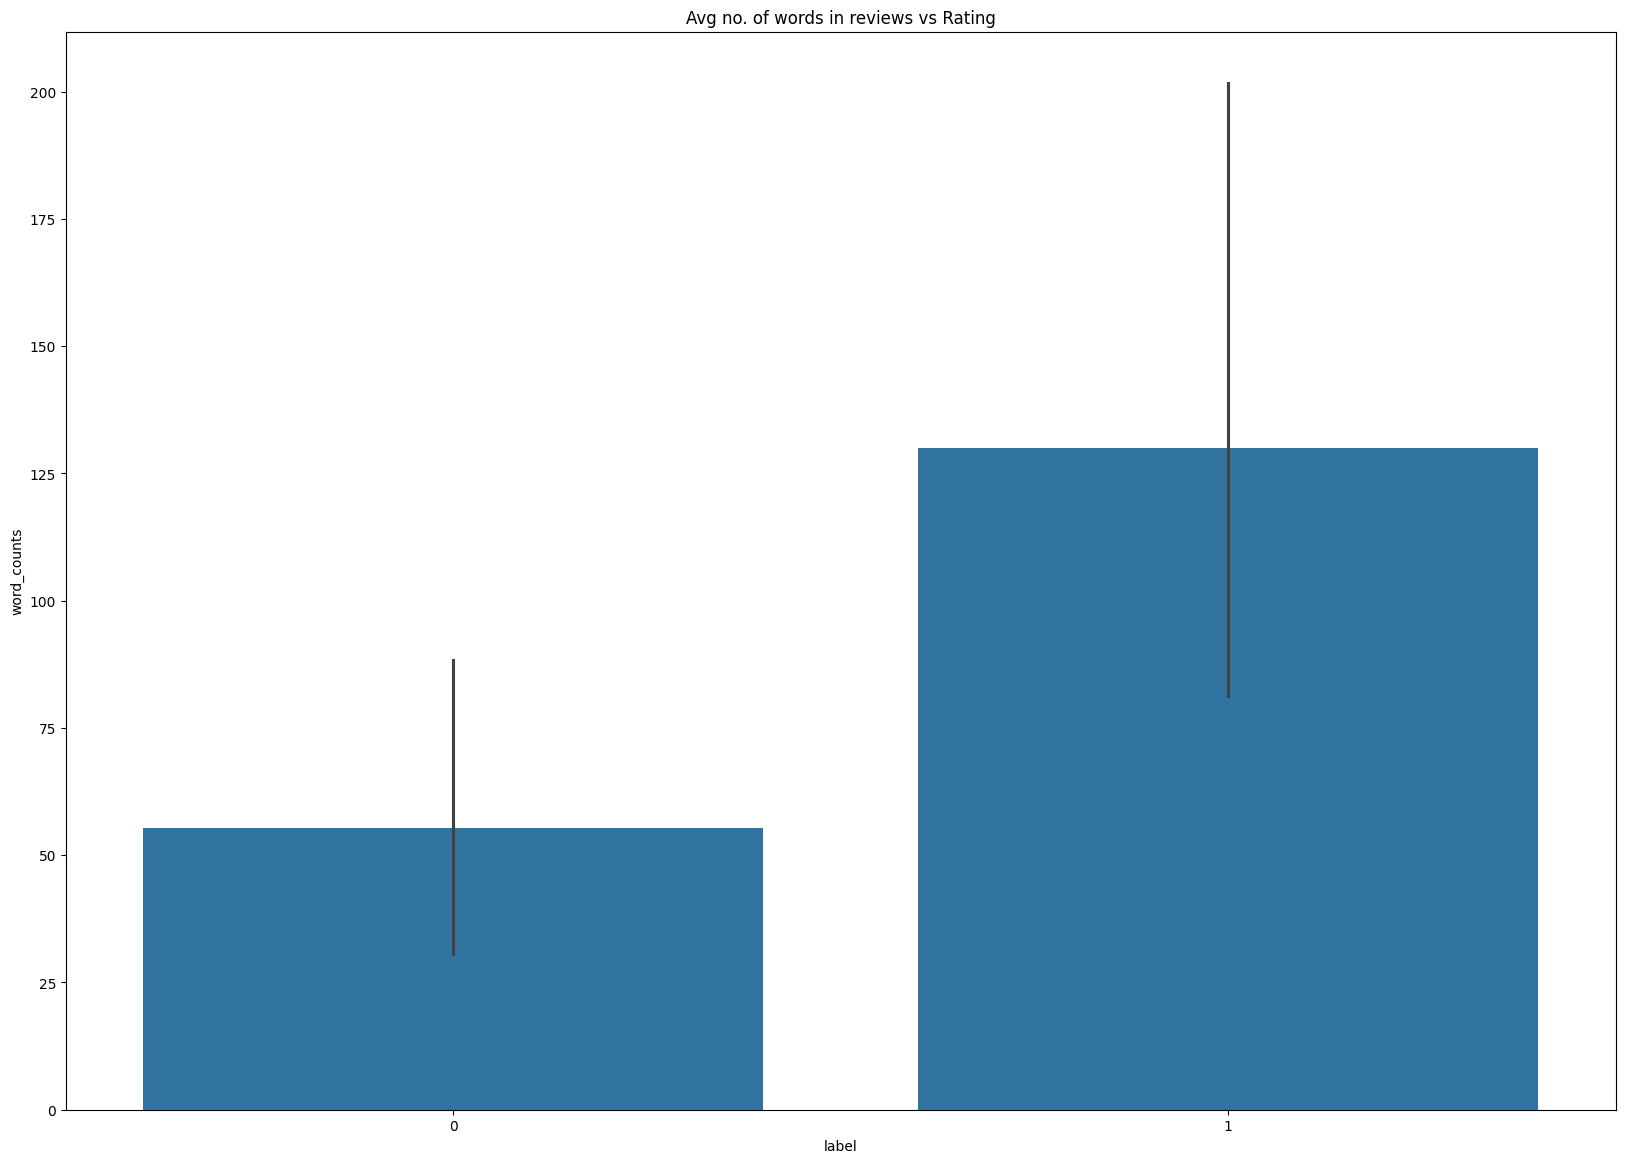

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 14))
sns.barplot(x='label', y='word_counts', data=df_data)
plt.title('Avg no. of words in reviews vs Rating')
plt.show()


In [87]:
# from the above plot we can see the the average of words in positive reviews are higher than the one in negative ones.
print(df_data.isna().sum())

reviewText     0
label          0
word_counts    0
dtype: int64


In [88]:
#spliting the data into the train and test data
from sklearn.model_selection import train_test_split
train, test=train_test_split(df_data, test_size=0.3)

In [89]:
print(train.shape)

(35, 3)


In [90]:
print(test.shape)

(15, 3)


In [91]:
import nltk
nltk.download('wordnet')



[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [92]:
t=train['reviewText']


In [93]:
def text_prepocessing(text):
    # Your preprocessing code here
    processed_text = text.lower()  # Example preprocessing: converting text to lowercase
    return processed_text

In [94]:
t=train['reviewText']

In [95]:
train.head()

,reviewText,label,word_counts
44,'ve done recording say noticeable improvement ...,1,56
11,"'s wonderful perfect ! hard case , n't slip , ...",0,36
33,'ve lot cases phone ( never completely satisfi...,0,187
35,excellent case solution galaxy camera 2. found...,1,74
8,"interesting phone - like capacitive keyboard ,...",1,126


In [96]:
test.head()

,reviewText,label,word_counts
30,glad got wife daughters always dropping phones...,0,10
9,absolutely fantastic ! never use anything hard...,0,12
17,pros : charger pretty decent charge phones usb...,1,98
10,n't need reflective film reflects windshield ....,1,94
46,* update * dropping review 3 stars 1 star . ru...,1,204


In [97]:
y_train=train['label']

In [98]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

def text_processing(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Removing punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    processed_text = ' '.join(tokens)

    return processed_text

# Example usage:
review = "This is a sample review text, containing some punctuations and stopwords."
processed_review = text_processing(review)
print(processed_review)


This sample review text containing punctuation stopwords


In [99]:
train.head()

,reviewText,label,word_counts
44,'ve done recording say noticeable improvement ...,1,56
11,"'s wonderful perfect ! hard case , n't slip , ...",0,36
33,'ve lot cases phone ( never completely satisfi...,0,187
35,excellent case solution galaxy camera 2. found...,1,74
8,"interesting phone - like capacitive keyboard ,...",1,126


In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [101]:
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)

In [102]:
tfidf_matrix = tfidf.fit_transform(df['reviewText'])

In [103]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
result_df = pd.concat([df, tfidf_df], axis=1)

In [104]:
print(result_df)


                                           reviewText  label        10  100  \
1   dock amazing ! little apprehensive spending mu...    0.0  0.000000  0.0   
2   loyal t-mobile customer 4 years purchased kits...    0.0  0.000000  0.0   
3   system definitely well built plenty metal part...    0.0  0.000000  0.0   
4   bought solar portable battery pack flashlight ...    1.0  0.000000  0.0   
5   several headsets years including motorola , ja...    1.0  0.000000  0.0   
..                                                ...    ...       ...  ...   
33                                                NaN    NaN  0.000000  0.0   
35                                                NaN    NaN  0.000000  0.0   
36                                                NaN    NaN  0.000000  0.0   
39                                                NaN    NaN  0.000000  0.0   
46                                                NaN    NaN  0.073614  0.0   

     12        14   15   16  180us   20  ...      w

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [106]:
X = result_df.drop('label', axis=1)  # Assuming 'target_column_name' is the name of your target column
y = result_df['label']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Assuming df is your DataFrame with 'reviewText' and 'label' columns
X = df['reviewText']
y = df['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to numerical features using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Fit SVM model
svm = SVC()
svm.fit(X_train_tfidf, y_train)


SVC()

In [111]:
# Assuming X_test is your test set of text data
X_test_tfidf = tfidf.transform(X_test)

# Make predictions
y_pred = svm.predict(X_test_tfidf)


In [112]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [113]:
print("SVM Model Parameters:")
print(svm.get_params())

SVM Model Parameters:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [114]:
print("\nAccuracy:", accuracy)


Accuracy: 0.8


In [115]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.80      1.00      0.89         8

    accuracy                           0.80        10
   macro avg       0.40      0.50      0.44        10
weighted avg       0.64      0.80      0.71        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import time

# Assuming df is your DataFrame with 'reviewText' and 'label' columns
X = df['reviewText']
y = df['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to numerical features using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Start the timer
start_time = time.time()

# Fit SVM model
svm = SVC()
svm.fit(X_train_tfidf, y_train)

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed Time (seconds):", elapsed_time)


Elapsed Time (seconds): 0.0030808448791503906


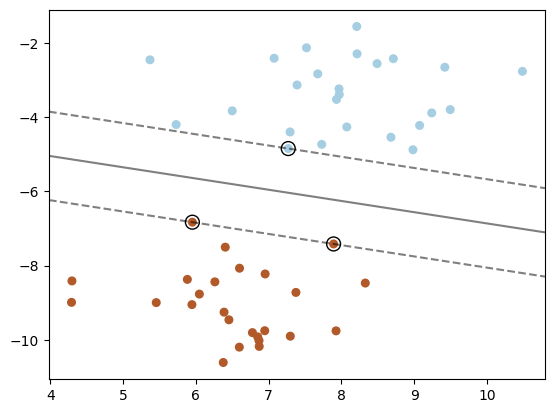

In [120]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

# Generate some data
X, y = datasets.make_blobs(n_samples=50, centers=2, random_state=6)

# Fit the SVM model
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()


In [126]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_tfidf, y_train)
predictions = clf.predict(X_test_tfidf)
print(predictions)

[1 1 1 1 1 1 1 1 1 1]


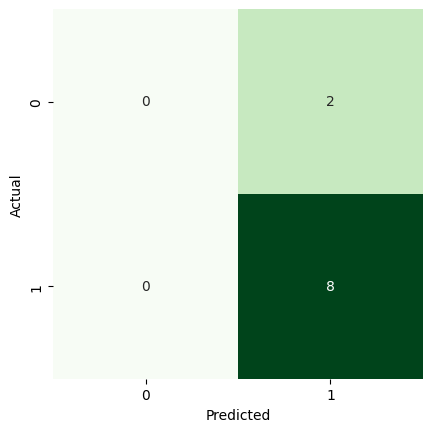

In [137]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming predictions and y_test are already defined
cm = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
sns.heatmap(cm, square=True, annot=True, cmap="Greens", fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
